Spannung längenanpassung
16
60
mu1/sigma1/mu2/sigma2/mu3/sigma3:
[ 4.27394628e+00  5.00141692e-01  8.15907566e+00  2.91942173e+01
  1.26857510e+01  4.99990080e-01 -7.90599648e+04  2.29037896e+03
  6.32946238e+00 -4.26842726e+01]
Fehler:
[3.90425387e+08 3.98745534e+08 9.27573587e+01 1.06643269e+02
 2.13722736e+08 2.18960174e+08 0.00000000e+00 0.00000000e+00
 1.38928254e+02 2.55606107e+02]


Text(0.5, 0, '10^19')

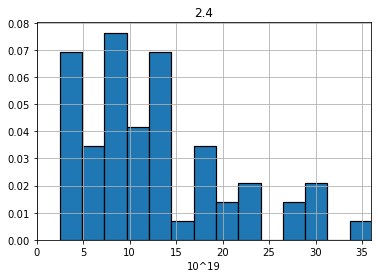

In [86]:
#Benotigte Madule(inkl. in Anaconda)
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random
from scipy.stats import norm

import sys

#1. U;t1;t2;x ersetzen und ihre fehler
#2. anzahl an gaußfunktionen wählen
#3. Startwerte beta0 richtig wählen(vorallem die müs)
#4. stepsize bzw binnabstand fürs histogram


def gau(x,m,o):
    return (1/np.sqrt(2*np.pi*o**2))*np.exp(-(x-m)**2/(o**2)*2)

def func(B, x):
    [m1,o1,m2,o2,m3,o3,m4,o4,m5,o5]=B
    return gau(x,m1,o1)+gau(x,m2,o2)+gau(x,m3,o3)+gau(x,m4,o4)+gau(x,m5,o5)
    
def fit(x,y,x_err,y_err):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige
    model = Model(func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, model, beta0=[4.,0.5,9., 0.5,13., 0.5,19.,0.5,31,0.5])
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out

#Spannung
U=np.array([496,494,493,493,493,492,491,491,495,497,497,497,497,497,497,496])

U_fehler=1
U_err=np.full(len(U),U_fehler)

#Zeit:
t2=np.array([3.59,2.68,5.74,4.17,2.38,3.57,3.53,7.72,3.12,2.09,1.49,2.03,2.03,1.2,1.28,2.12,
            1.90,7.20,7.62,2.77,1.84,2.12,2.08,1.89,3.59,3.89,4.14,5.39,41.69,3.92,2.93,1.83,6.64,1.63,2.29,9.37,3.05,7.76,6.92,4.03,7.44,
            3.23,4.21,2.11,9.00,6.51,2.86,3.24,2.26,8.73,7.32,3.44,4.38,8.75,5.60,4.03,3.78,2.35,4.75,3.02])
t1=np.array([22.16,22.05,5.24,32.58,24.69,32.95,33.94,14.92,34.78,83.15,27.44,54.09,50.33,7.29,25.89,36.08,
            9.33,28.60,27.48,46.90,17.89,26.28,26.36,21.60,9.70,14.43,14.80,22.48,13.70,28.81,16.22,21.24,28.76,17.86,59.12,23.59,11.14,13.41,10.20,25.01,3.30,
            8.08,30.05,9.08,25.23,39.53,16.67,16.89,29.22,26.89,31.92,27.61,11.26,16.86,3.95,4.58,5.23,26.39,55.28,14.13])


t_fehler=0.1
t_err=np.full(len(t1),t_fehler)
t1_err=t2_err=t_err

if len(U)!=len(t1):
    print("Spannung längenanpassung")
    print(len(U))
    print(len(t1))
    U=np.full(len(t1),495)
    U_err=np.full(len(U),U_fehler)


#Strecke; x ist gemessen durchs Mikroskop; s ist umgerechnet in den Realen wert
x=np.array([1,1])
x=np.full(len(t1),2)

x_fehler=0.1
x_err=np.full(len(x),x_fehler)

#Position
z=1.875 #zoom

z_err=1.875*0.01
s=x/z*10**(-3)
s_err=np.sqrt((1/z*10**(-4)*x_err)**2+
              (x*10**(-4)*z_err/z**2)**2)

#Geschwindigkeit
v1=s/t1
v1_err=np.sqrt((s_err/t1)**2+(s*t1_err/t1**2)**2)
v2=s/t2
v2_err=np.sqrt((s_err/t2)**2+(s*t2_err/t2**2)**2)


eta=1.81*10**(-5)
d=6*10**(-3)
poel=875.3
pl=1.29
p=874
p_err=0
g=9.81

Q=(v1+v2)*np.sqrt(v1)/U*eta**(3/2)*18*np.pi*d/np.sqrt(2*p*g)
q=Q
Q=Q*10**19
#Als BSP
#Q=np.array([1,2,2,2,3,3,3,3,3,4,6,6,6,6,6,8,9,9,9,9,10]);


Q_err=9*np.pi*d*eta**(3/2)/np.sqrt(g*p)*np.sqrt(((3*v1+v2)/(U*np.sqrt(2*v1))*v1_err)**2+
                                                (np.sqrt(2*v1)/U*v2_err)**2+
                                                (np.sqrt(2*v1)*(v1+v2)/U**2*U_err)**2)
#Als BSP:
Q_err=np.nan




#Anpassen für schönnes Histogramm
stepsize=2.4

#Histogramm erstellen

bins=np.arange(min(Q)-stepsize/2,max(Q)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(Q,bins=bins,density=True,edgecolor='black', linewidth=1.2)
plt.title(stepsize)

#Fit erstellen
xf=bins+stepsize/2
xf=xf[:-1]
yf=n

out=fit(xf,yf,np.nan,np.nan)

#Fit-Funktionswerte Berechnen
x_p=np.linspace(bins[0],max(Q),5000)
y_p=func(out.beta,x_p)

#Plotten
#f=plt.plot(x_p,y_p)
plt.grid()
plt.xlim(0,36)

#Für die Korektur:
#welches eta? 
r=np.sqrt(9*eta*v1/(2*p*g))
#r_err überprüfen
r_err=1/(2*np.sqrt(9*eta*v1/(2*p*g)))*9*eta/(2*p*g)*v1_err
#xk=1/(p*r)
#yk=Q**(2/3)

#xk_err=np.sqrt((r_err/(r**2*p))**2+(p_err/(p**2*r))**2)
#yk_err=2/(3*Q**(1/3))*Q_err



#def func(B, x):
#    [b,y0]=B
#    return y0*(1+b*x)

#out=fit(xk,yk,np.nan,yk_err)



print("mu1/sigma1/mu2/sigma2/mu3/sigma3:")
print(out.beta)
print("Fehler:")
print(out.sd_beta)
plt.xlabel("10^19")


In [59]:
q

array([9.65500070e-19, 1.25141279e-18, 2.23932782e-18, 6.65455207e-19,
       1.30182864e-18, 7.59457689e-19, 7.53816067e-19, 7.14545760e-19,
       8.31599862e-19, 7.55314694e-19, 1.89675031e-18, 9.75821340e-19,
       1.01434890e-18, 5.04730223e-18, 2.26258942e-18, 1.16748650e-18,
       2.91224460e-18, 4.56484084e-19, 4.49005036e-19, 7.83933613e-19,
       1.98983887e-18, 1.39626740e-18, 1.41864035e-18, 1.73846017e-18,
       1.72066803e-18, 1.20642556e-18, 1.12826527e-18, 6.81205118e-19,
       3.67911005e-19, 7.58174564e-19, 1.40491174e-18, 1.80837667e-18,
       4.85373453e-19, 2.22446825e-18, 8.28373383e-19, 4.31101824e-19,
       1.75702900e-18, 7.80081770e-19, 1.06640351e-18, 8.08993789e-19,
       3.38130693e-18, 2.14075615e-18, 6.93685645e-19, 2.72171732e-18,
       4.21417603e-19, 3.99565759e-19, 1.40882474e-18, 1.25683553e-18,
       1.23831213e-18, 4.10882484e-19, 4.17395491e-19, 8.73630346e-19,
       1.32702533e-18, 5.93662107e-19, 3.05030917e-18, 3.06072314e-18,
      

In [61]:
n

array([0.06410256, 0.04487179, 0.07051282, 0.05128205, 0.04487179,
       0.01923077, 0.01923077, 0.02564103, 0.        , 0.01282051,
       0.01923077, 0.        , 0.00641026, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00641026])

In [52]:
len(t2)

41

20